In [9]:
# ingest the data


In [10]:
import pandas as pd
import os
import numpy as np




In [ ]:
### Introduction About the Data :
    
    *The dataset* The goal is to predict price of given diamond (Regression Analysis).
    
    There are 10 independent variables (including id):,
    
    * id : unique identifier of each diamond
    * carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
    * cut : Quality of Diamond Cut
    * color : Color of Diamond
    * clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.\n",
    * depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
    * table : A diamonds table is the facet which can be seen when the stone is viewed face up.
    * x : Diamond X dimension
    * y : Diamond Y dimension
    * x : Diamond Z dimension

Target variable
  * price :Price of the given Diamond

Data Source Link :  kaggal

In [13]:
data=pd.read_csv(r"C:\FSDSMENDTOEND\notebook\data\cubic_zirconia.csv")

In [15]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [16]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682
26966,26967,1.25,Premium,J,SI1,62.0,58.0,6.90,6.88,4.27,5166


In [17]:
data.sample(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
7551,7552,1.03,Ideal,F,SI2,61.8,56.0,6.49,6.46,4.00,4454
16516,16517,0.51,Ideal,G,VS1,61.3,55.7,5.15,5.18,3.16,1595
18331,18332,1.30,Ideal,H,VVS1,62.8,55.2,6.94,6.97,4.36,9232
15830,15831,0.32,Ideal,D,SI1,60.8,57.0,4.44,4.41,2.69,756
11889,11890,0.33,Ideal,G,VVS2,62.6,53.0,4.45,4.43,2.78,901


In [19]:
data.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [18]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [21]:
data['depth'].fillna(data['depth'].median(), inplace=True)


C:\Users\DEEPAK\AppData\Local\Temp\ipykernel_11392\1817060026.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['depth'].fillna(data['depth'].median(), inplace=True)


In [22]:
# now again checking the missing value
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26967 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


EDA step by step 

In [31]:
data.drop('Unnamed: 0', axis=1, inplace=True)


In [32]:
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [33]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [34]:
data.duplicated().sum()

np.int64(34)

In [35]:
import numpy as np

# Example np.int64 value
num_duplicates = np.int64(34)

# Convert to a regular integer
num_duplicates_int = int(num_duplicates)
print(num_duplicates_int)  # Output: 34


34


In [36]:
data.duplicated().sum()

np.int64(34)

In [37]:
num_duplicates = data.duplicated().sum()

# Check the type
print(f"Type before conversion: {type(num_duplicates)}")  # Should be <class 'numpy.int64'>

# Convert to a regular integer
num_duplicates_int = int(num_duplicates)
print(f"Type after conversion: {type(num_duplicates_int)}")  # Should be <class 'int'>
print(num_duplicates_int)  # Output: 34

Type before conversion: <class 'numpy.int64'>
Type after conversion: <class 'int'>
34


In [38]:
data.duplicated().sum()

np.int64(34)

In [39]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26962    False
26963    False
26964    False
26965    False
26966    False
Length: 26967, dtype: bool

In [41]:
data.shape

(26967, 10)

In [42]:
# segarte the feature 
# cat vs num
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [46]:
categorical_columns=data.columns[data.dtypes=="object"] # catgo

In [47]:
numerical_columns=data.columns[data.dtypes !="object"]

In [50]:
data[categorical_columns].describe()

,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [52]:
data[numerical_columns].describe().T #(T = transpose )

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26967.0,61.746564,1.394509,50.8,61.10,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [58]:
# values count of different catego
data[categorical_columns]["cut"].value_counts()


cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: count, dtype: int64

In [57]:
data[categorical_columns]["color"].value_counts()

color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: count, dtype: int64

In [59]:
data[categorical_columns]["clarity"].value_counts()

clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: count, dtype: int64

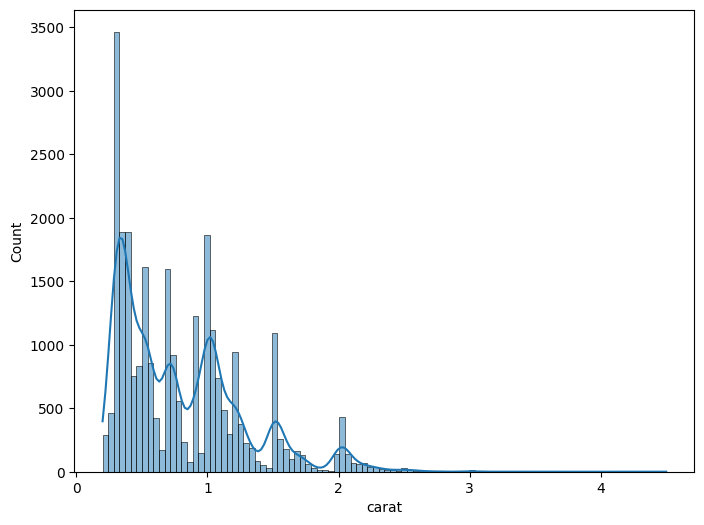

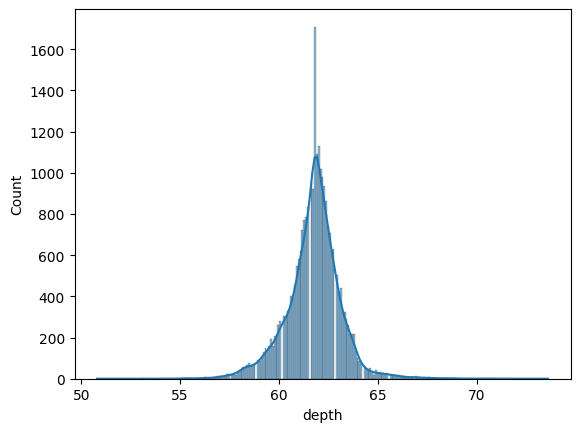

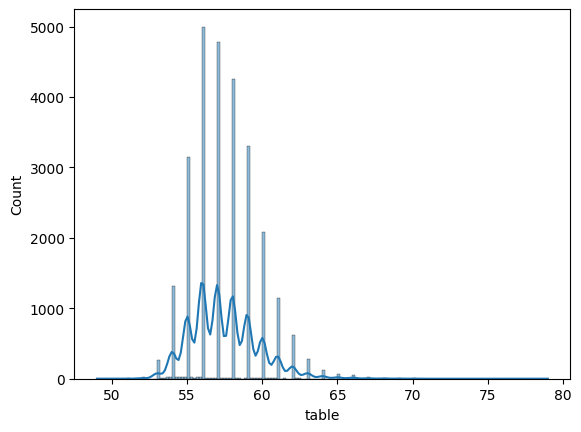

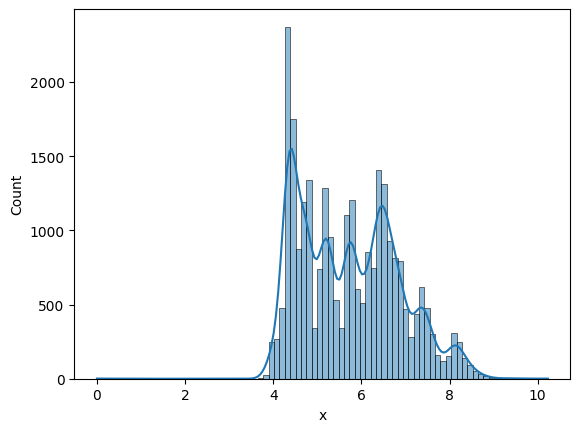

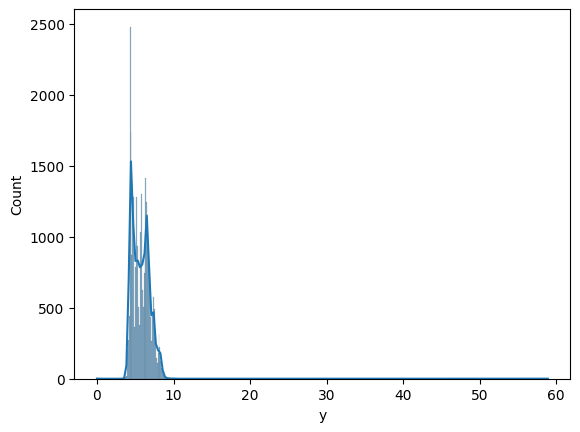

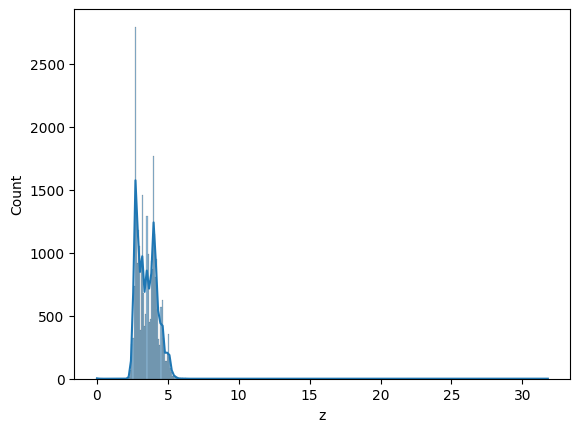

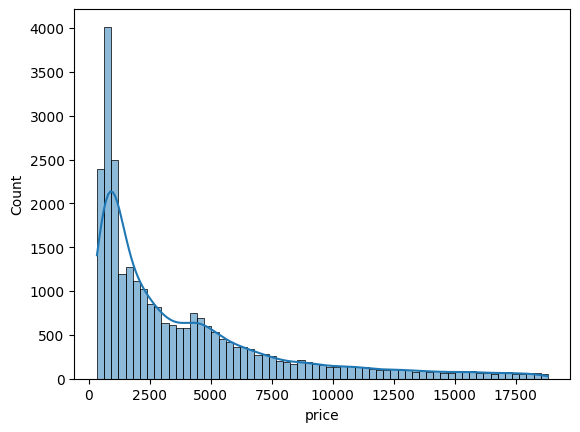

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

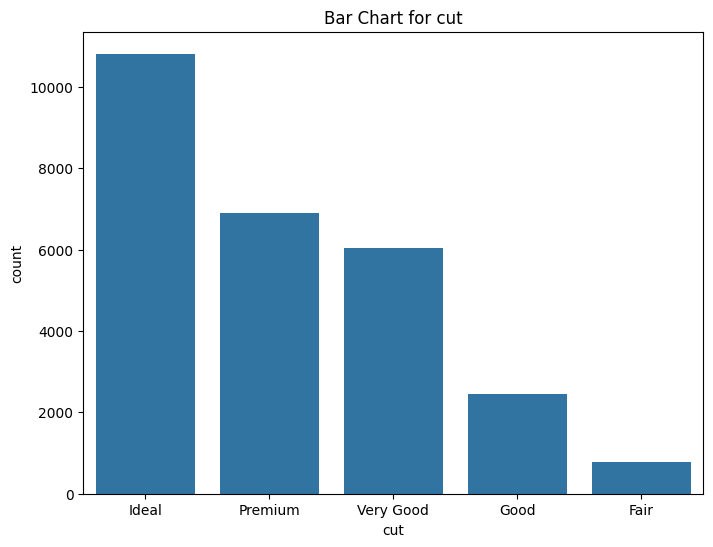

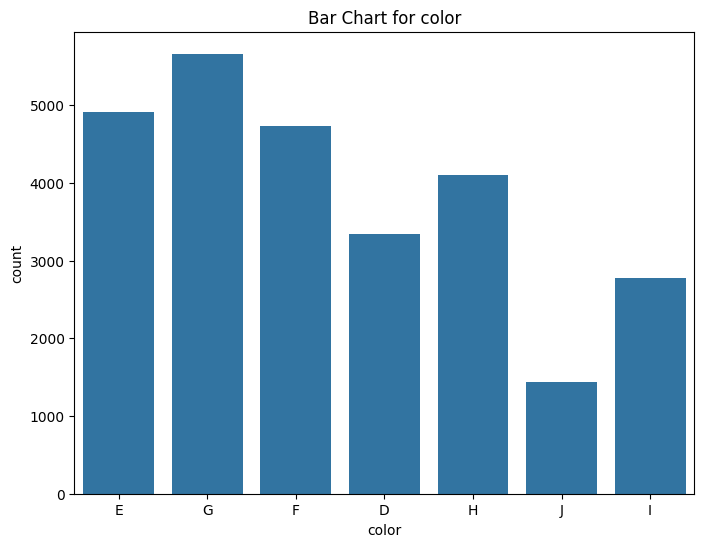

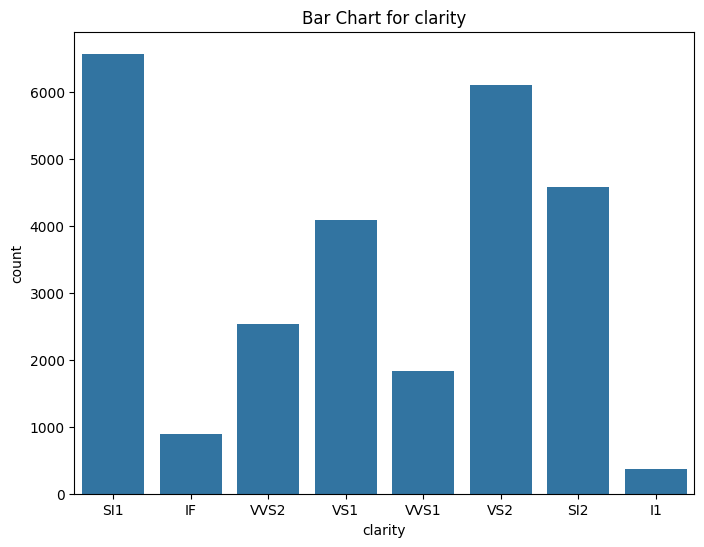

In [69]:
## barplot for the categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)  # Countplot for categorical data
    plt.title(f'Bar Chart for {col}')
    plt.show()
    print("\n")

<Axes: >

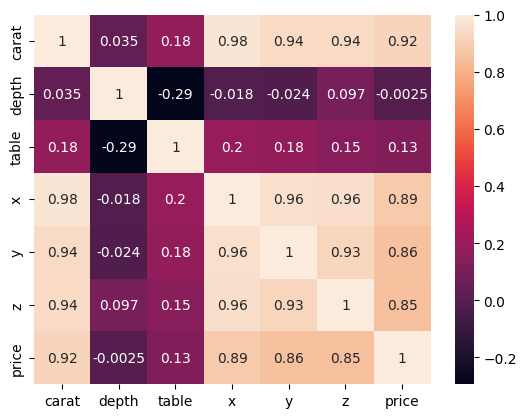

In [70]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [71]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [72]:
# encoding
data["clarity"].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [73]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [74]:
data['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [75]:
# its a ordinial encoding
cut_map={"Fair":1,"Good":2,"Very Good":3,"premium":4,"Ideal":5}


In [76]:
clarity_map={"I1":1,"SI2":2,"SI1":3,"VS2":4,"VS1":5,"WS2":6,"WS1":7,"IF":8}


In [77]:
color_map={"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7}

In [85]:
data["cut"]=data["cut"].map(cut_map)

In [83]:
data["clarity"]=data["clarity"].map(clarity_map)

In [84]:
data["color"]=data["color"].map(color_map)

In [86]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5.0,2,3.0,62.1,58.0,4.27,4.29,2.66,499
1,0.33,NaN,4,8.0,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3.0,2,NaN,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5.0,3,5.0,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5.0,3,NaN,60.4,59.0,4.35,4.43,2.65,779
